In [14]:
from pathlib import Path
import sys, importlib.util

def add_project_root(marker="src", max_up=6):
    """현재 CWD에서 위로 올라가며 'src' 폴더가 보이는 지점을 sys.path에 추가"""
    p = Path.cwd()
    for _ in range(max_up):
        if (p/marker).exists():
            p_str = str(p)
            if p_str not in sys.path:
                sys.path.insert(0, p_str)  # 최우선
            return p
        p = p.parent
    raise RuntimeError(f"'{marker}' not found within {max_up} parents from {Path.cwd()}")

root = add_project_root()  # 보통 /home/.../Projects/minervini
print("USING ROOT:", root)
print("ROOT/src exists?:", (root/"src").exists())
print("find_spec('src'):", importlib.util.find_spec("src"))

USING ROOT: /home/brighter87/Projects/minervini
ROOT/src exists?: True
find_spec('src'): ModuleSpec(name='src', loader=<_frozen_importlib_external.NamespaceLoader object at 0x743ce906a930>, submodule_search_locations=_NamespacePath(['/home/brighter87/Projects/minervini/src']))


파일 없음: /home/brighter87/Projects/minervini/src/data/cached/OHLC/ohlc_2025-09-26.parquet


(<Figure size 1226.67x690 with 4 Axes>,
 [<Axes: ylabel='Price'>,
  <Axes: >,
  <Axes: ylabel='Volume\n  $10^{6}$'>,
  <Axes: >])

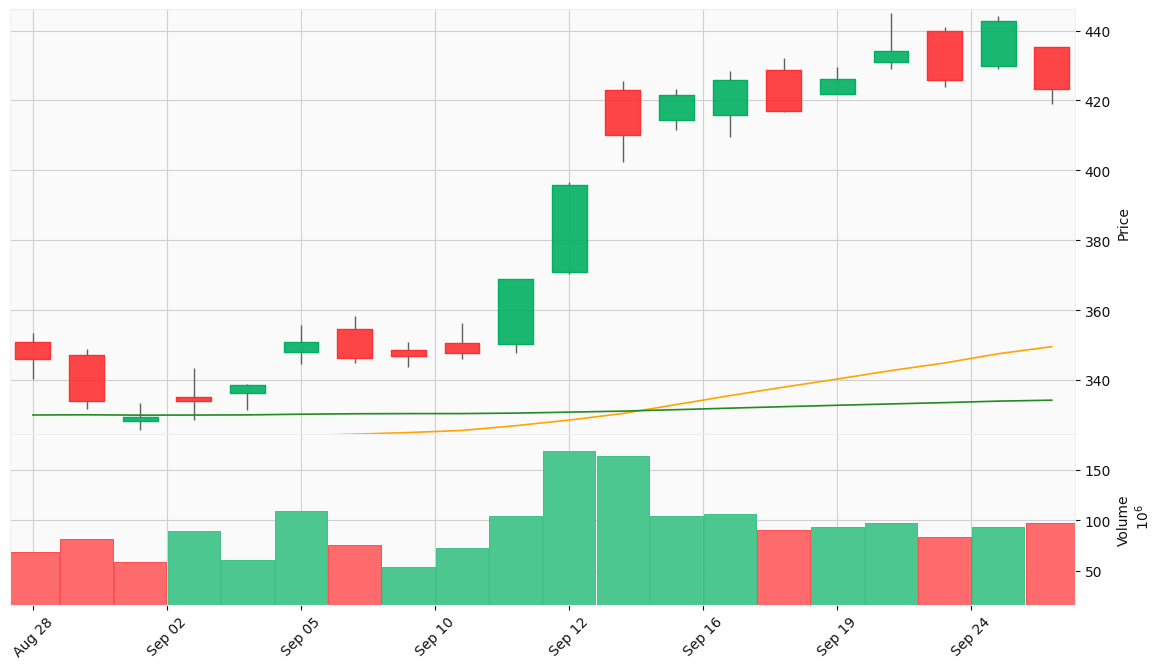

In [18]:
import mplfinance as mpf
from src.analysis.prepare import get_a_ticker_for_charts

ticker = "TSLA"
df = get_a_ticker_for_charts(ticker, days=20)
df = df.set_index("date")

# OHLC 칼럼 이름을 mplfinance에 맞추기
df = df.rename(columns={
    "o":"Open", "h":"High", "l":"Low", "c":"Close", "v":"Volume"
})

apds = [
    mpf.make_addplot(df['ma50'],  color='#FFA500', width=1.2),
    mpf.make_addplot(df['ma150'], color='#8A2BE2', width=1.2),
    mpf.make_addplot(df['ma200'], color='#228B22', width=1.2),
]

mpf.plot(
    df,
    type='candle',
    addplot=apds,
    volume=True,
    style='yahoo',
    ylabel='Price',
    ylabel_lower='Volume',
    tight_layout=True,
    figscale=1.2,
    figratio=(16,9),
    # legend 켜기
    returnfig=True
)